In [1]:
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel("./National_Accidents_Australia.xlsx")

In [3]:
df.shape

(117919, 13)

In [4]:
df.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [5]:
df.drop(['Calendar year'], axis=1, inplace=True)

In [6]:
df.head()

,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [7]:
df['Month'] = pd.factorize(df['Month'])[0]

df['Counterparty'] = pd.factorize(df['Counterparty'])[0]

df['ABS remoteness area'] = pd.factorize(df['ABS remoteness area'])[0]

df['Cause of injury'] = pd.factorize(df['Cause of injury'])[0]

df['Age group'] = pd.factorize(df['Age group'])[0]

df['Sex'] = pd.factorize(df['Sex'])[0]

df['Road user'] = pd.factorize(df['Road user'])[0]

In [8]:
df.head()

,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,0,0,0,0,0,0,0,765.0,1007,NaN,NaN,765
1,0,0,0,0,1,0,0,1010.0,1694,NaN,NaN,1010
2,0,0,0,1,0,0,0,859.0,1597,NaN,NaN,859
3,0,0,0,1,1,0,0,2231.0,3878,2.0,3.0,2229
4,0,0,0,2,0,0,0,1098.0,2347,1.0,14.0,1097


In [9]:
df['Died_cases'].fillna(0, inplace=True)

df['Died_bed_days'].fillna(0, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Month                  0
ABS remoteness area    0
Cause of injury        0
Age group              0
Sex                    0
Road user              0
Counterparty           0
Count of cases         0
Bed days               0
Died_cases             0
Died_bed_days          0
Hospitalisations       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112982 entries, 0 to 117918
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Month                112982 non-null  int64  
 1   ABS remoteness area  112982 non-null  int64  
 2   Cause of injury      112982 non-null  int64  
 3   Age group            112982 non-null  int64  
 4   Sex                  112982 non-null  int64  
 5   Road user            112982 non-null  int64  
 6   Counterparty         112982 non-null  int64  
 7   Count of cases       112982 non-null  float64
 8   Bed days             112982 non-null  int64  
 9   Died_cases           112982 non-null  float64
 10  Died_bed_days        112982 non-null  float64
 11  Hospitalisations     112982 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 11.2 MB


In [13]:
df['target'] = df['Bed days'] / df['Count of cases']

In [14]:
df.drop(['Count of cases'], axis=1, inplace=True)

In [15]:
df.head()

,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Bed days,Died_cases,Died_bed_days,Hospitalisations,target
0,0,0,0,0,0,0,0,1007,0.0,0.0,765,1.316340
1,0,0,0,0,1,0,0,1694,0.0,0.0,1010,1.677228
2,0,0,0,1,0,0,0,1597,0.0,0.0,859,1.859139
3,0,0,0,1,1,0,0,3878,2.0,3.0,2229,1.738234
4,0,0,0,2,0,0,0,2347,1.0,14.0,1097,2.137523


In [16]:
# X, y = df.drop(['target'], axis=1), df['target']

X, y = df.drop(['target', 'Month', 'ABS remoteness area', 'Counterparty'], axis=1), df['target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    subsample=0.6,
    learning_rate=0.7,
)

In [25]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.7, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
pred = xgb_model.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 1.06
MAE: 0.26
R^2: 0.99


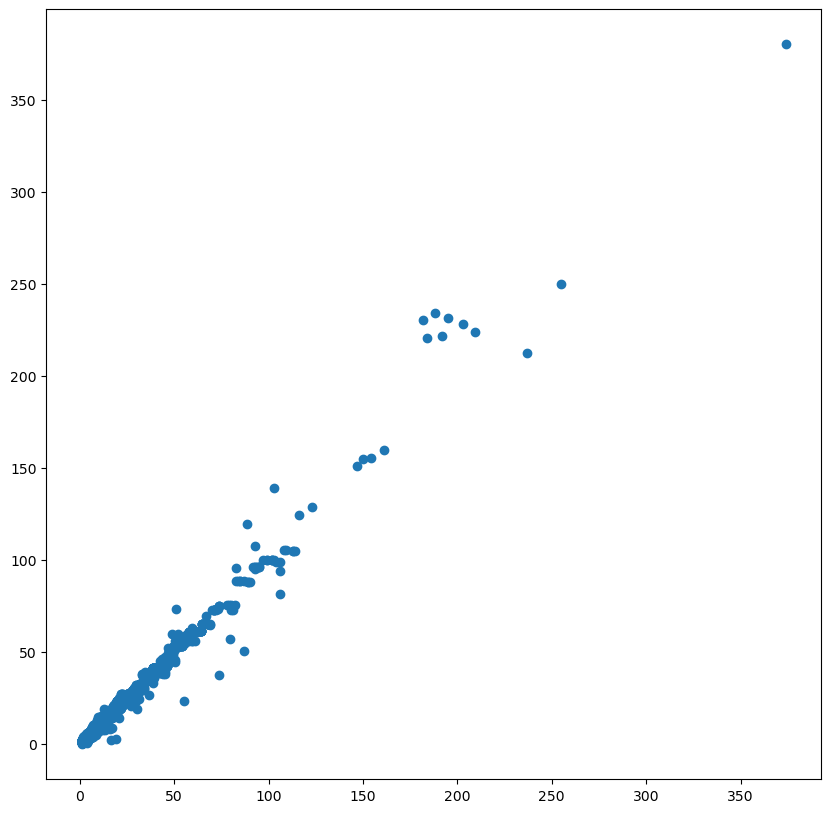

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred)

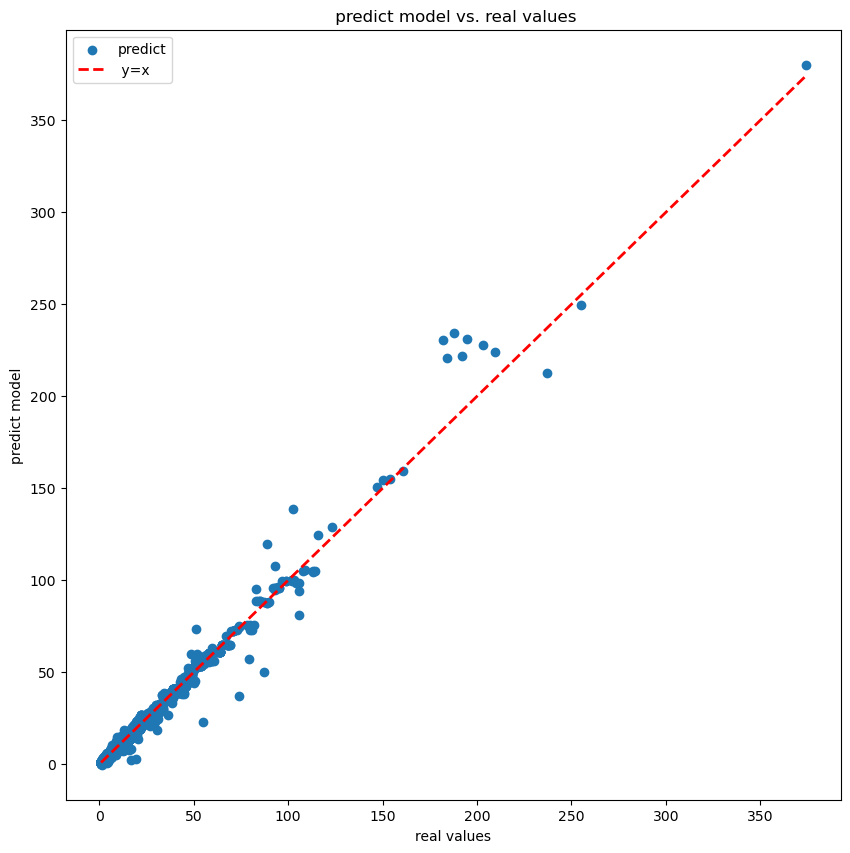

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# رسم نمودار scatter
_ = ax.scatter(y_test, pred, label='predict')

# رسم خط y=x
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label=' y=x')

# افزودن لجند
ax.legend()

# تنظیمات دیگر
ax.set_title(' predict model vs. real values')
ax.set_xlabel('real values')
ax.set_ylabel('predict model')

# نمایش نمودار
plt.show()


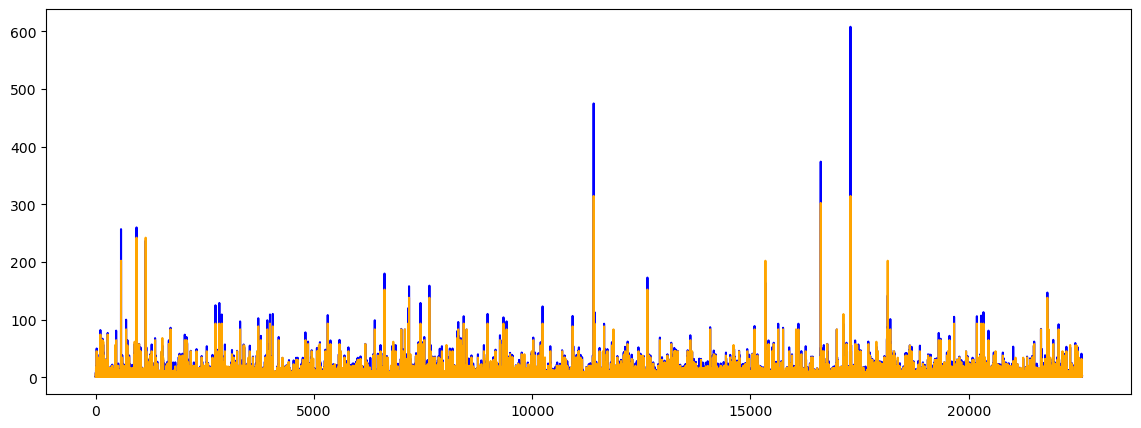

In [37]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(range(len(y_test)), y_test, label='Real values', color='blue')

ax.plot(range(len(y_test)), pred, label='prediction', color='orange')


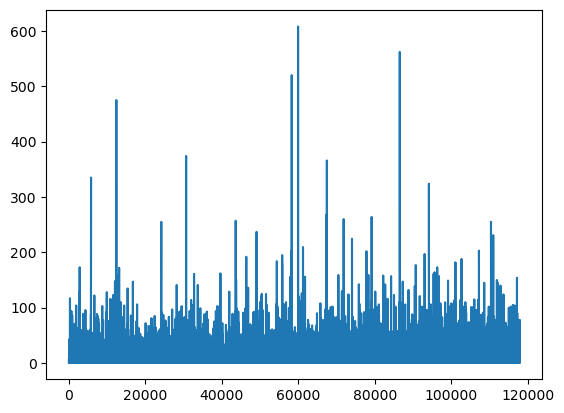

In [24]:
plt.plot(df['target'])

In [25]:
df2 = df[df['Road user'] == 1].query("target > 14")

X, y = df2.drop(['target', 'Month', 'ABS remoteness area', 'Counterparty'], axis=1), df2['target']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    subsample=0.3,
    learning_rate=1.01,
)

In [28]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
pred = xgb_model.predict(x_test)

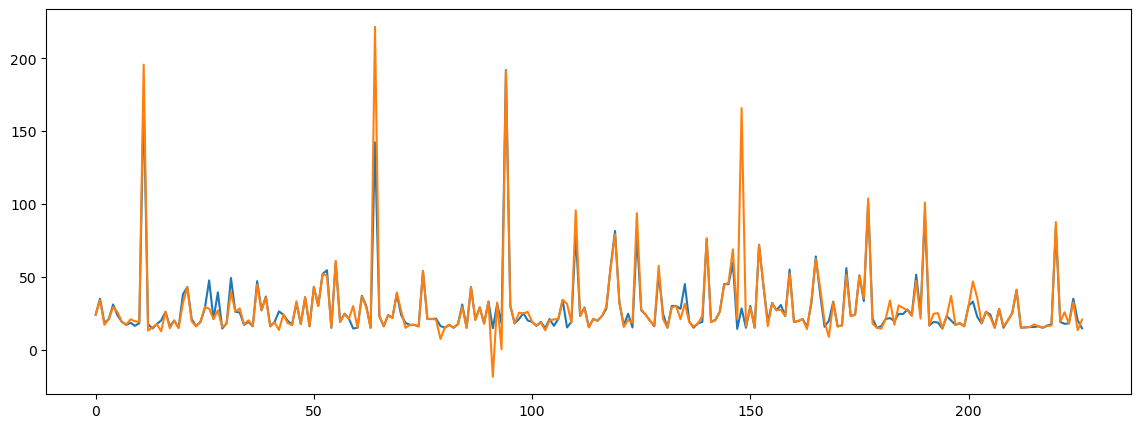

In [30]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# محاسبه ریشه میانگین مربعات خطا (RMSE)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

# محاسبه میانگین قدر مطلق خطا (MAE)
mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

# محاسبه ضریب تعیین (R^2)
r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 11.72
MAE: 3.35
R^2: 0.73


NameError: name 'y_true' is not defined

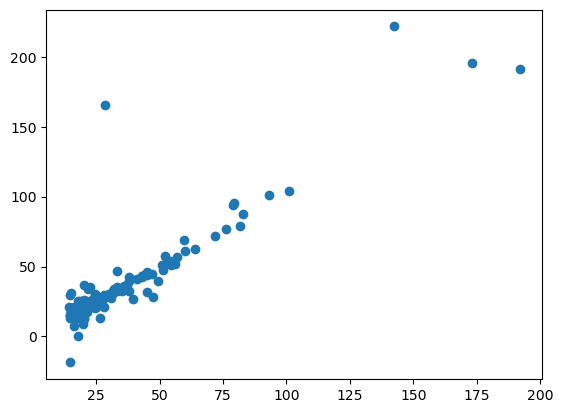

In [32]:
import matplotlib.pyplot as plt

# مقادیر واقعی


# رسم نمودار پراکندگی
plt.scatter(y_test, pred)

# رسم خط ایده آل y=x
min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Line')

# رسم خط رگرسیون بهترین برازش
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(y_test, pred)
best_fit_line = [slope * x + intercept for x in y_true]
plt.plot(y_true, best_fit_line, 'g-', label='Best Fit Line')

# تنظیمات نمودار
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Evaluation')
plt.legend()

plt.show()

In [31]:
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plot.show()

NameError: name 'plot' is not defined

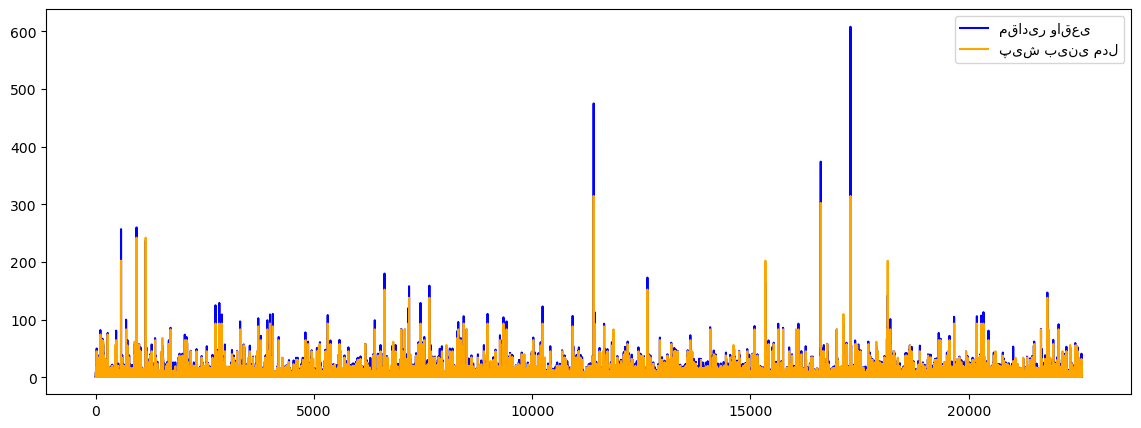

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))

# رسم نمودار مقادیر واقعی (آبی)
ax.plot(range(len(y_test)), y_test, label='مقادیر واقعی', color='blue')

# رسم نمودار پیش‌بینی‌ها (نارنجی)
ax.plot(range(len(y_test)), pred, label='پیش بینی مدل', color='orange')

# افزودن لجند
ax.legend()

# نمایش نمودار
plt.show()
